In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
df_new = pd.read_csv('C:/Users/manis/Desktop/Data Science material/wowlabz/Dummy_Data.csv')

In [67]:
df_new.columns

Index(['Id', 'lat', 'long', 'timeStamp'], dtype='object')

In [69]:
BBox = (df_new.long.min(),   df_new.long.max(), df_new.lat.min(), df_new.lat.max())

In [70]:
map_plot = plt.imread('C:/Users/manis/Desktop/Data Science material/wowlabz/lalbagh.png')

In [71]:
map_plot

array([[[0.9647059 , 0.9647059 , 0.9647059 , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        ...,
        [0.9137255 , 0.90588236, 0.8862745 , 1.        ],
        [0.9137255 , 0.90588236, 0.8862745 , 1.        ],
        [0.9137255 , 0.90588236, 0.8862745 , 1.        ]],

       [[1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        ...,
        [0.9137255 , 0.90588236, 0.8862745 , 1.        ],
        [0.9137255 , 0.90588236, 0.8862745 , 1.        ],
        [0.9137255 , 0.90588236, 0.8862745 , 1.        ]],

       [[1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        ...,
        [0.9137255 , 0.90588236, 0.8862745 , 1.        ],
        [0.9137255 , 0.905882

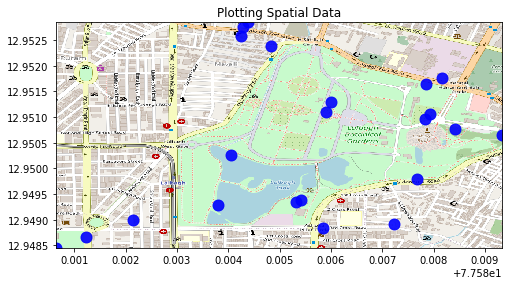

In [72]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_new.long, df_new.lat, alpha= 0.9, c='b', s=120)

ax.set_title('Plotting Spatial Data')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(map_plot, zorder=0, extent = BBox, aspect= 'equal')

In [4]:
##from platform import python_version
##print(python_version())

3.7.6


In [10]:
import folium as fm
import pandas as pd

In [34]:
m = fm.Map(location=[12.9484531, 77.5806383938105], zoom_start=16)
m

In [74]:
m = fm.Map(location=[12.9484531, 77.5806383938105], zoom_start=16)
m
lines = [
    {
        "coordinates": [
            [77.5806383938105, 12.9483256942807],
            [77.57685430008542, 12.948221133969756],
        ],
        "dates": ["2017-06-02T00:00:00", "2017-06-02T00:10:00"],
        "color": "red",
    },
    {
        "coordinates": [
            [ 77.57685430008542, 12.948221133969756],
            [77.57688445880954, 12.943633179881775],
        ],
        "dates": ["2017-06-02T00:10:00", "2017-06-02T00:20:00"],
        "color": "blue",
    },
    {
        "coordinates": [
            [77.57688445880954, 12.943633179881775],
            [77.58012519587498, 12.943658049116676],
        ],
        "dates": ["2017-06-02T00:20:00", "2017-06-02T00:30:00"],
        "color": "green",
        "weight": 10,
    },
    {
        "coordinates": [
            [77.58012519587498, 12.943658049116676],
            [77.57996566233943, 12.9483256942807],
        ],
        "dates": ["2017-06-02T00:30:00", "2017-06-02T00:40:00"],
        "color": "#FFFFFF",
    },
]

In [75]:
features = [
    {
        "type": "Feature",
        "geometry": {
            "type": "LineString",
            "coordinates": line["coordinates"],
        },
        "properties": {
            "times": line["dates"],
            "style": {
                "color": line["color"],
                "weight": line["weight"] if "weight" in line else 5,
            },
        },
    }
    for line in lines]

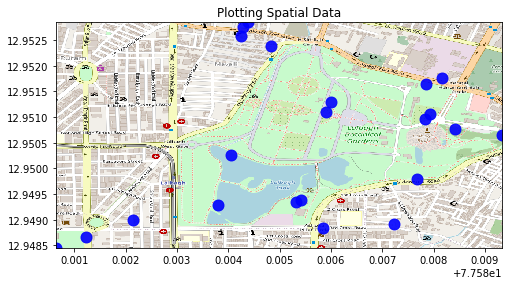

In [79]:
import folium
from folium import plugins

plugins.TimestampedGeoJson(
    {
        "type": "FeatureCollection",
        "features": features,
    },
    period="PT1M",
    add_last_point=True,
).add_to(m)

fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_new.long, df_new.lat, alpha= 0.9, c='b', s=120)

ax.set_title('Plotting Spatial Data')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(map_plot, zorder=0, extent = BBox, aspect= 'equal')

In [62]:
m